In [ ]:
import io
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from urllib.request import urlopen
import IPython

C:\Users\fateme\AppData\Local\Temp/ipykernel_24348/4236392850.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = np.array(img_grey, dtype=np.float)


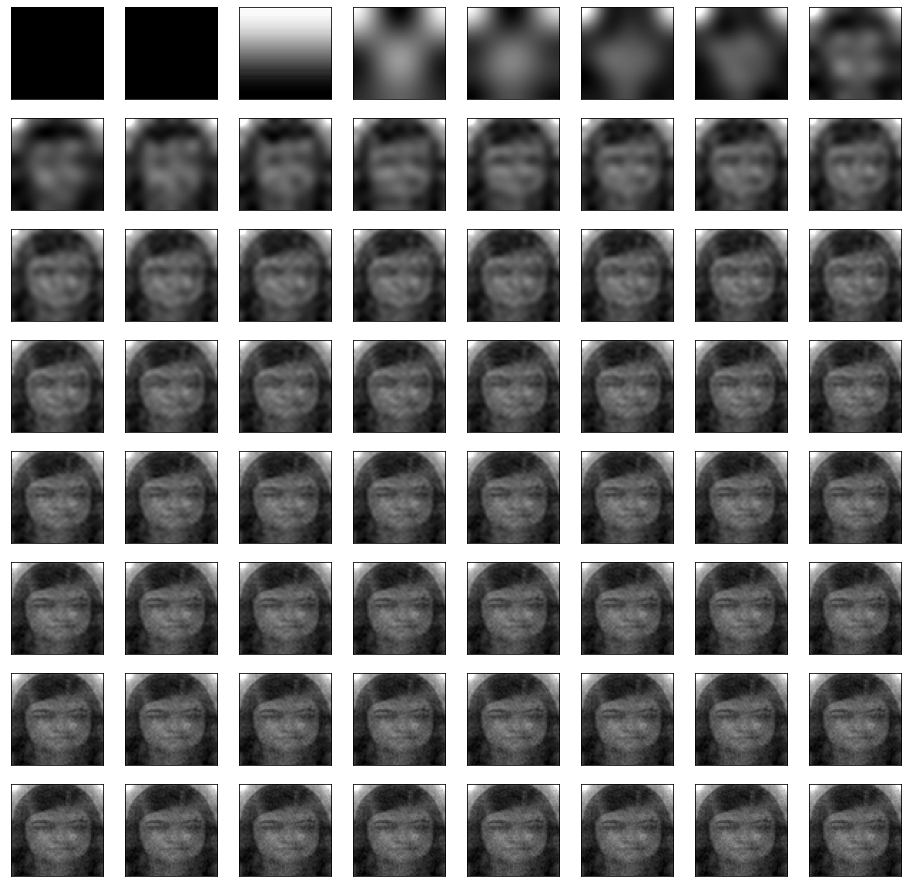

In [18]:
image_path=r'noisy_image.png'

# reads the image from url using PIL and converting it into a numpy array after converted grayscale image.
def get_image_from_url(image_path, size=(128, 128)):

    image = Image.open(image_path)
    img_color = image.resize(size, 1)
    img_grey = img_color.convert('L')
    img = np.array(img_grey, dtype=np.float)
    return img

# 2D transform
def get_2D_dct(img):
    return fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')


#2D inverse transform
def get_2d_idct(coefficients):
    return fftpack.idct(fftpack.idct(coefficients.T, norm='ortho').T, norm='ortho')

#Reconstruct img
def get_reconstructed_image(raw):
    img = raw.clip(0, 255)
    img = img.astype('uint8')
    img = Image.fromarray(img)
    return img

pixels = get_image_from_url(image_path, size=(65, 65))
dct_size = pixels.shape[0]
dct = get_2D_dct(pixels)
treshold = 3 * 0.005

dct = np.where(dct < treshold, 0, dct)

reconstructed_images = []

for ii in range(dct_size):
    dct_copy = dct.copy()
    dct_copy[ii:,:] = 0
    dct_copy[:,ii:] = 0
    
    # Reconstructed image
    r_img = get_2d_idct(dct_copy);
    reconstructed_image = get_reconstructed_image(r_img);

    # Create a list of images
    reconstructed_images.append(reconstructed_image);


fig = plt.figure(figsize=(16, 16))
for ii in range(64):
    plt.subplot(8, 8, ii + 1)
    plt.imshow(reconstructed_images[ii], cmap=plt.cm.gray)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

plt.show()

In [15]:
plt.show(reconstructed_images)